In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, mean_absolute_error, mean_squared_error, r2_score, get_scorer_names
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import randint

In [101]:
#Classification
df = pd.read_csv("instance_dataset.csv")

def mood_to_label(mood):
    if mood <= 4:
        return "low"
    elif mood <= 7:
        return "medium"
    else:
        return "high"
df['id_numeric'] = df['id'].astype('category').cat.codes
df['period_start'] = df['period'].str.extract(r'(\d+)-').astype(int)
df["mood_label"] = df["mood"].apply(mood_to_label)

y = df["mood_label"] 
X = df.drop(columns=["id", "date_period", "period", "mood", "mood_label"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


param_dist = {
    'n_estimators': randint(100, 300),           # Number of trees
    'max_depth': [None] + list(range(5, 30, 5)), # Max tree depth
    'min_samples_split': [2, 5, 10],             # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Min samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features per split
}

rf = RandomForestClassifier(random_state=42)

search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                            n_iter=50, cv=5, 
                            scoring='accuracy',
                            random_state=42, n_jobs=-1)

search.fit(X, y)

print("Best parameters found:")
print(search.best_params_)

print("Best CV score:")
print(search.best_score_)

c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Best parameters found:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 195}
Best CV score:
0.6253861927546138


c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(



Classification Report:
              precision    recall  f1-score   support

         low       0.00      0.00      0.00         2
      medium       0.80      0.94      0.87       154
        high       0.69      0.37      0.48        54

    accuracy                           0.79       210
   macro avg       0.50      0.44      0.45       210
weighted avg       0.76      0.79      0.76       210



c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

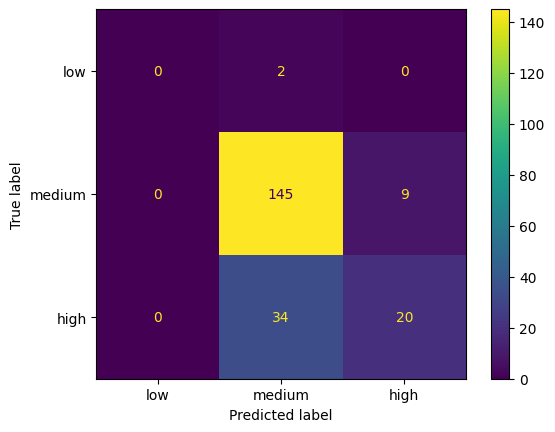

In [102]:
best_rf = RandomForestClassifier(
    n_estimators=195,
    max_depth=5,
    max_features='auto',
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

label_order = ["low", "medium", "high"]
print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=label_order))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, labels=label_order)

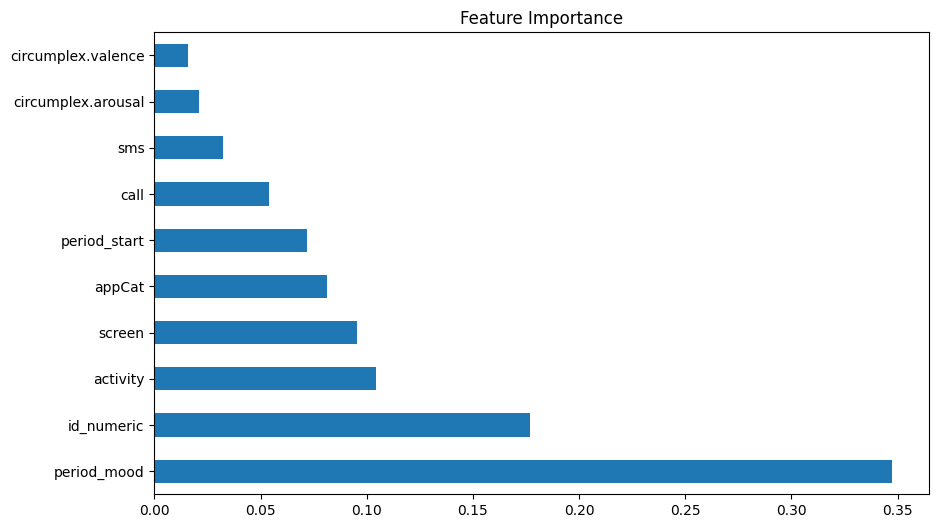

In [103]:
importances = best_rf.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

feat_imp.plot(kind='barh', figsize=(10, 6))
plt.title("Feature Importance")
plt.show()

In [104]:
# Regression
df = pd.read_csv("instance_dataset.csv")

df['id_numeric'] = df['id'].astype('category').cat.codes
df['period_start'] = df['period'].str.extract(r'(\d+)-').astype(int)
X = df.drop(columns=["id", "date_period", "period", "mood"])
y = df["mood"]             

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_dist = {
    'n_estimators': randint(100, 300),           # Number of trees
    'max_depth': [None] + list(range(5, 30, 5)), # Max tree depth
    'min_samples_split': [2, 5, 10],             # Min samples to split a node
    'min_samples_leaf': [1, 2, 4],               # Min samples in a leaf
    'max_features': ['auto', 'sqrt', 'log2']     # Number of features per split
}

rf = RandomForestRegressor(random_state=42)

search = RandomizedSearchCV(rf, param_distributions=param_dist, 
                            n_iter=50, cv=5, 
                            scoring='neg_mean_squared_error',
                            random_state=42, n_jobs=-1)

search.fit(X, y)

print("Best parameters found:")
print(search.best_params_)

print("Best CV score:")
print(search.best_score_)


c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best parameters found:
{'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 195}
Best CV score:
-0.579528247879664


In [105]:
best_rf = RandomForestRegressor(
    n_estimators=195,
    max_depth=5,
    max_features='auto',
    min_samples_leaf=4,
    min_samples_split=10,
    random_state=42
)

best_rf.fit(X_train, y_train)
y_pred = best_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("R² Score:", r2)

c:\Users\frenk\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


MAE: 0.48676290954081997
MSE: 0.5138592059226407
R² Score: 0.21533272225801747


In [106]:
baseline = [y_train.mean()] * len(y_test)
baseline_mse = mean_squared_error(y_test, baseline)
print(f"Baseline MSE: {baseline_mse:.3f}")

Baseline MSE: 0.661
